In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split,  GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [45]:
df = pd.read_csv(r"C:\Users\omnia\Documents\level3.1\projects\heart-2.csv",encoding='latin-1')

In [3]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df.shape

(1025, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.loc[0:5, 'age'] = np.nan  
df.loc[10:15, 'fbs'] = np.nan   

In [9]:
df.isnull().sum()


age         6
sex         0
cp          0
trestbps    0
chol        0
fbs         6
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)

C:\Users\omnia\AppData\Local\Temp\ipykernel_24228\2407977241.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
C:\Users\omnia\AppData\Local\Temp\ipykernel_24228\2407977241.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df['target'].value_counts()


target
1    526
0    499
Name: count, dtype: int64

In [13]:
df['target'].unique()

array([0, 1])

In [16]:


duplicates = df[df.duplicated()]


print("Duplicate Rows:")
print(duplicates)



Duplicate Rows:
       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15    34.0    0   1       118   210  0.0        1      192      0      0.7   
31    50.0    0   1       120   244  0.0        1      162      0      1.1   
43    46.0    1   0       120   249  0.0        0      144      0      0.8   
55    55.0    1   0       140   217  0.0        1      111      1      5.6   
61    66.0    0   2       146   278  0.0        0      152      0      0.0   
...    ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020  59.0    1   1       140   221  0.0        1      164      1      0.0   
1021  60.0    1   0       125   258  0.0        0      141      1      2.8   
1022  47.0    1   0       110   275  0.0        0      118      1      1.0   
1023  50.0    0   0       110   254  0.0        0      159      0      0.0   
1024  54.0    1   0       120   188  0.0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0

In [17]:
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 715


In [18]:
df = df.drop_duplicates()


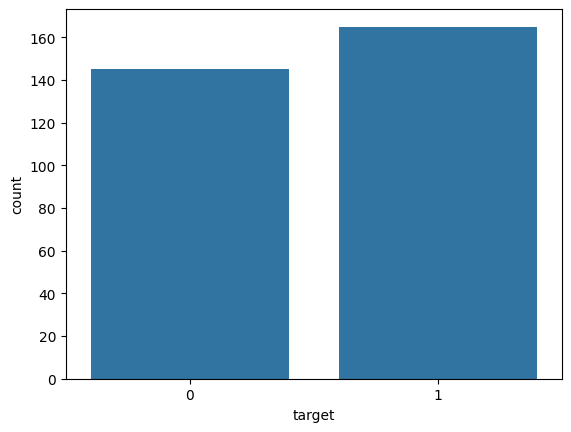

In [40]:
sns.countplot(x='target', data=df)
plt.show()

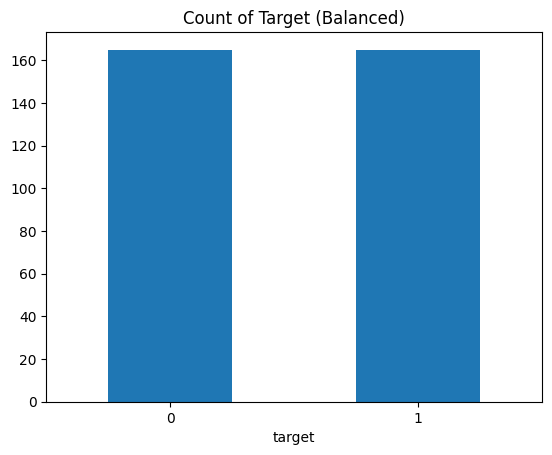

In [41]:
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt


count_class_yes = df[df['target'] == 0].shape[0]  
count_class_no = df[df['target'] == 1].shape[0]   


df_class_yes = df[df['target'] == 0]  
df_class_no = df[df['target'] == 1]   

df_class_yes_upsampled = resample(df_class_yes, 
                                  replace=True,      
                                  n_samples=count_class_no,  
                                  random_state=42)   

df_upsampled = pd.concat([df_class_yes_upsampled, df_class_no])


df_upsampled['target'].value_counts().plot(kind='bar', title='Count of Target (Balanced)')

plt.xticks(rotation=360)
plt.show()


In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,54.375586,0.680645,0.938710,131.612903,246.200000,0.151613,0.529032,149.351613,0.332258,1.060000,1.387097,0.719355,2.316129,0.532258
std,8.954624,0.466980,1.030027,17.484672,51.808822,0.359225,0.525218,22.887701,0.471785,1.163445,0.622003,1.008995,0.625818,0.499765
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,165.750000,1.000000,1.750000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,310.0,54.375586,8.954624,29.0,48.0,55.0,61.00,77.0
sex,310.0,0.680645,0.466980,0.0,0.0,1.0,1.00,1.0
cp,310.0,0.938710,1.030027,0.0,0.0,1.0,2.00,3.0
trestbps,310.0,131.612903,17.484672,94.0,120.0,130.0,140.00,200.0
chol,310.0,246.200000,51.808822,126.0,211.0,240.0,274.75,564.0
fbs,310.0,0.151613,0.359225,0.0,0.0,0.0,0.00,1.0
restecg,310.0,0.529032,0.525218,0.0,0.0,1.0,1.00,2.0
thalach,310.0,149.351613,22.887701,71.0,133.0,152.5,165.75,202.0
exang,310.0,0.332258,0.471785,0.0,0.0,0.0,1.00,1.0
oldpeak,310.0,1.060000,1.163445,0.0,0.0,0.8,1.75,6.2


In [21]:
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [ ]:
# sex=> gender
 # cp=> Chest Pain Type
 # trestbps=> Resting Blood Pressure
 # chol=> Cholesterol 
 # fbs=> Fasting Blood Sugar
 # restecg=>  Resting Electrocardiographic Results
 # thalach=> Maximum Heart Rate Achieved
 # exang => Exercise-Induced Angina
 # oldpeak=> ST Depression
 # slope=> Slope of the Peak Exercise ST Segment 
 # ca=> Number of Major Vessels
 # thal=> Thalassemia

C:\Users\omnia\AppData\Local\Temp\ipykernel_24228\4141805125.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(['No Heart disease','Heart disease'])


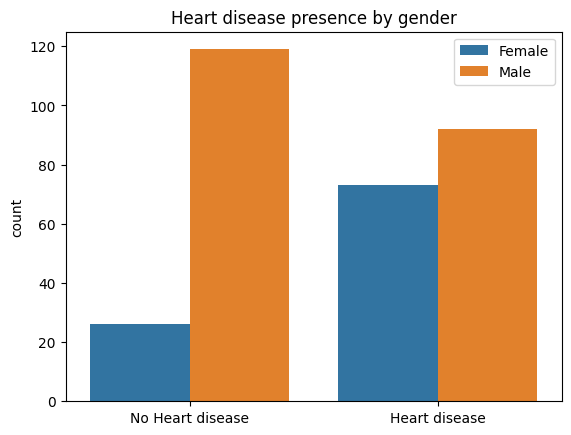

In [22]:
f = sns.countplot(x='target', data=df,hue='sex')
plt.legend(['Female','Male'])
f.set_title("Heart disease presence by gender")
f.set_xticklabels(['No Heart disease','Heart disease'])
plt.xlabel("")
plt.show()

<Axes: >

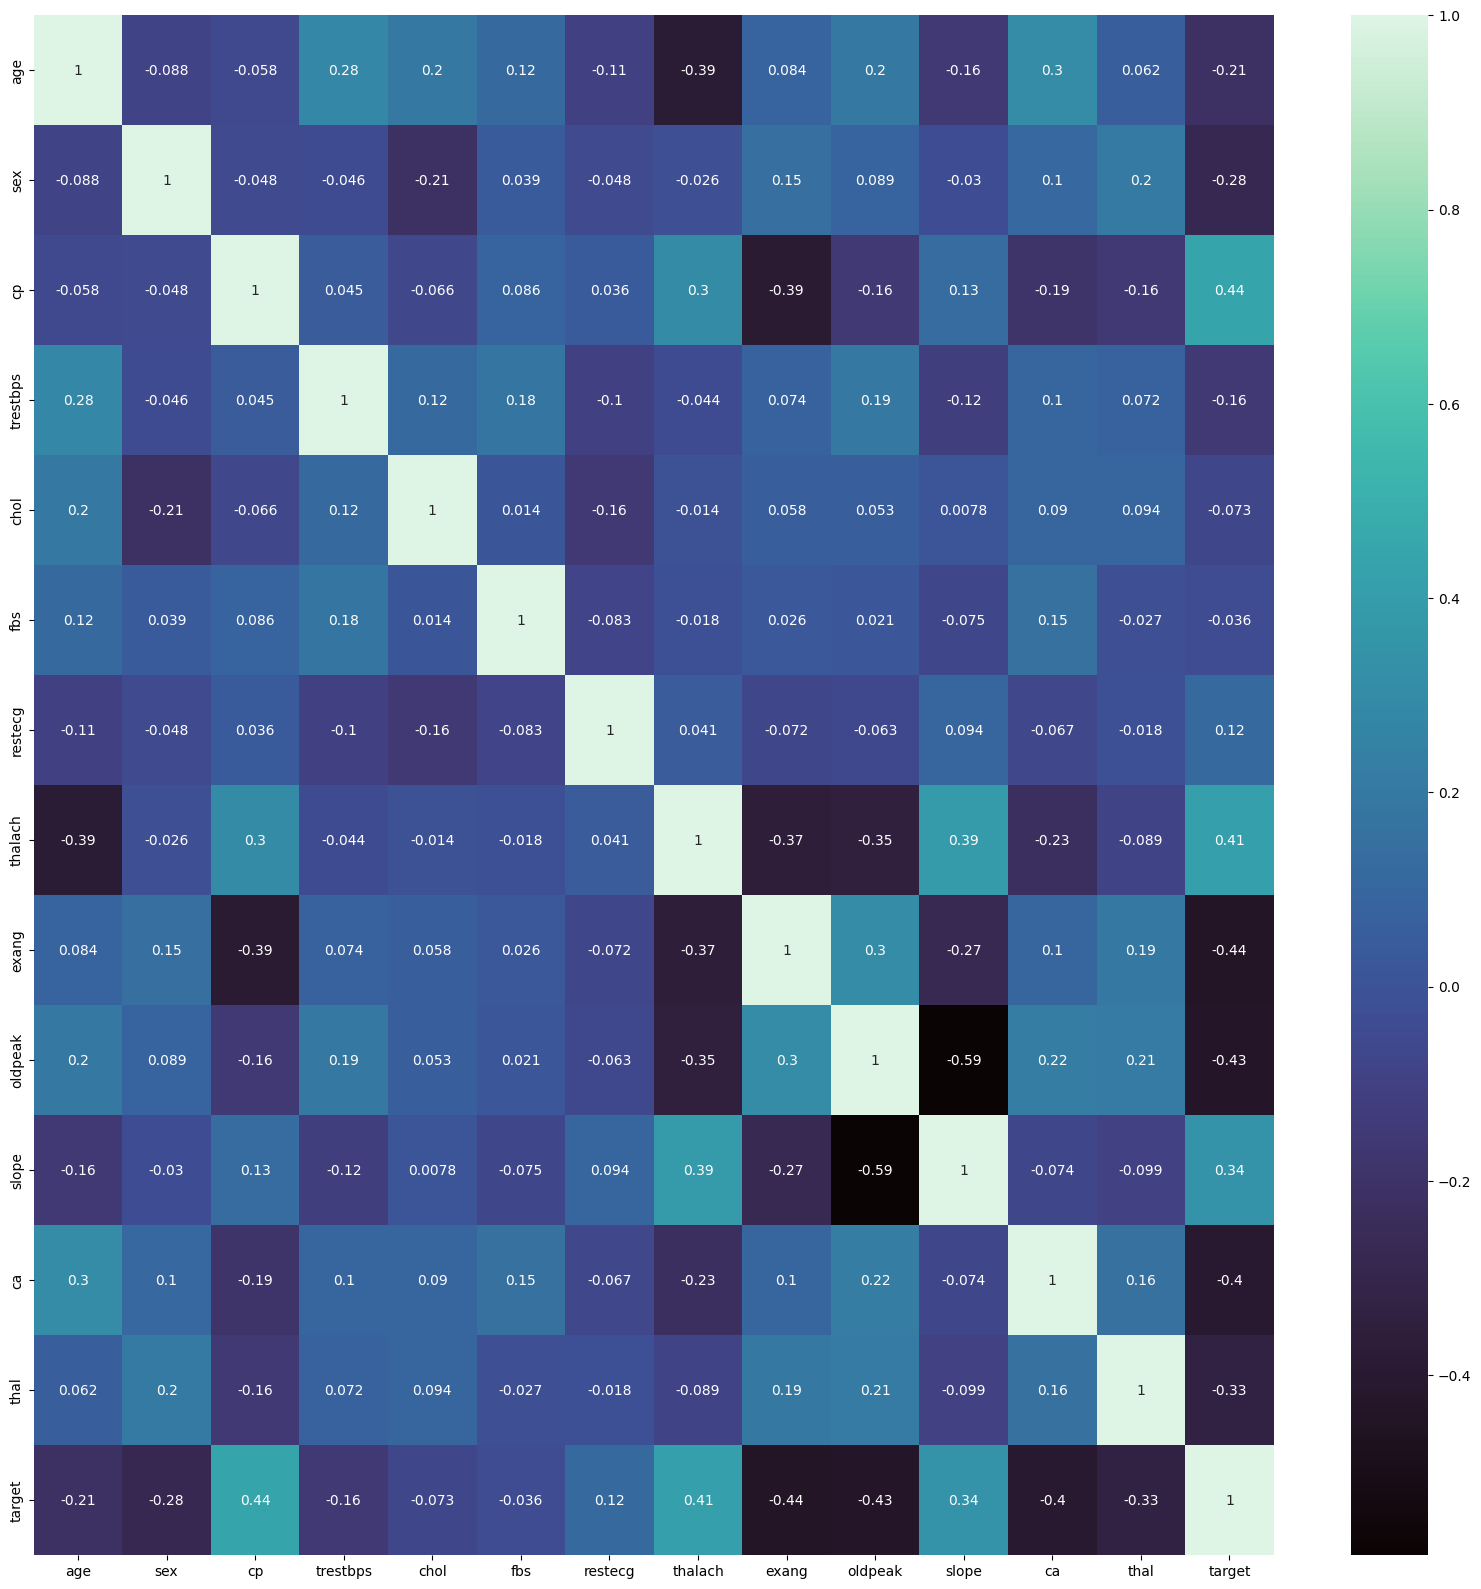

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="mako")

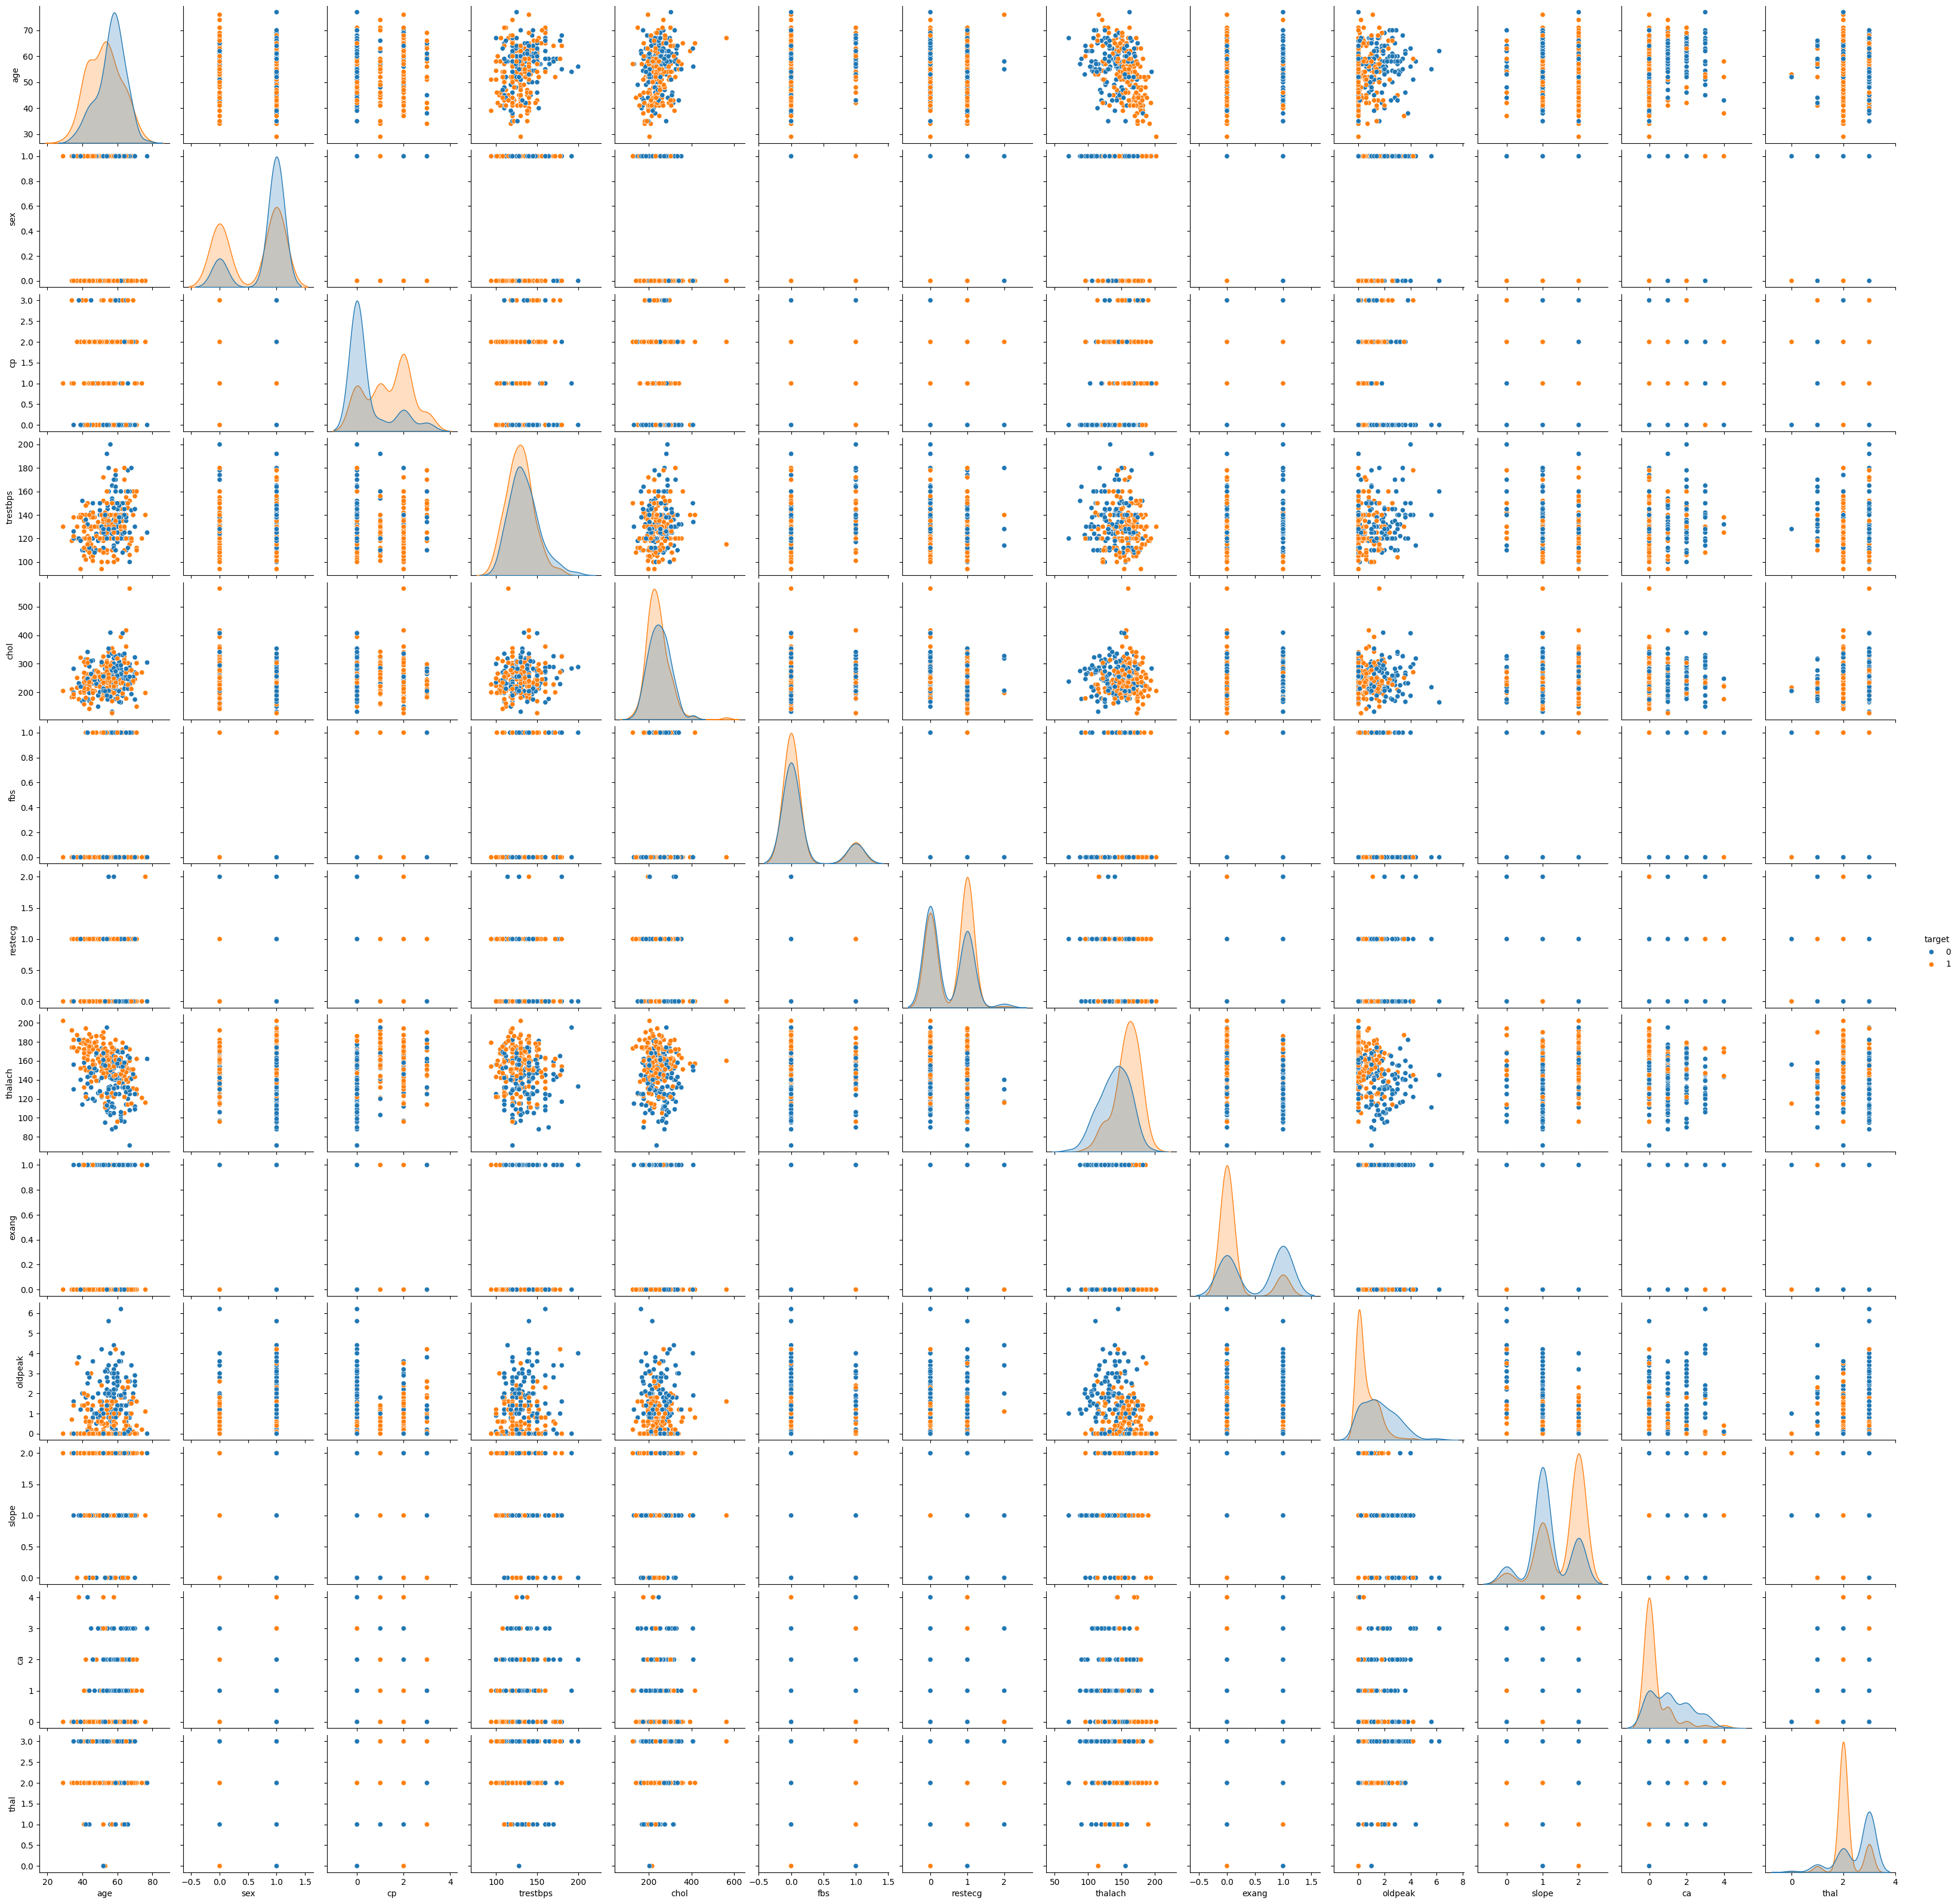

In [24]:
sns.pairplot(df,hue='target')

In [25]:
x=df.drop(['target'],axis=1)
y=df['target']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=101)

In [27]:
s = StandardScaler()

X_train = s.fit_transform(X_train)

X_test = s.fit_transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred=logmodel.predict(X_test)

Confusion matrix


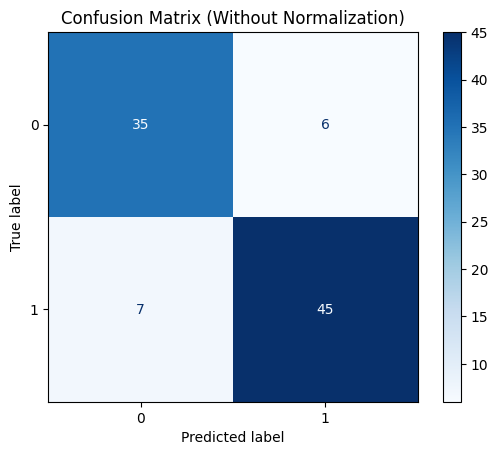

Normalized confusion matrix


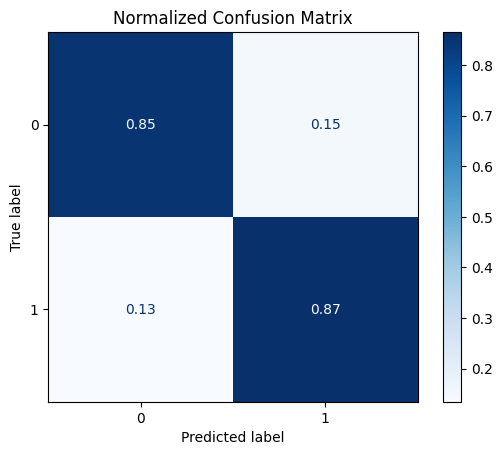

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix without normalization
print('Confusion matrix')
cm = confusion_matrix(y_test, logmodel.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logmodel.classes_)
disp.plot(cmap='Blues')  
plt.title('Confusion Matrix (Without Normalization)')
plt.show()

# Normalized confusion matrix
print('Normalized confusion matrix')
cm_normalized = confusion_matrix(y_test, logmodel.predict(X_test), normalize='true')
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=logmodel.classes_)
disp_normalized.plot(cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.show()


In [30]:
print(classification_report(y_test, pred))
print(classification_report(y_test, pred))

print('Accuracy Score:', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.88      0.87      0.87        52

    accuracy                           0.86        93
   macro avg       0.86      0.86      0.86        93
weighted avg       0.86      0.86      0.86        93

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.88      0.87      0.87        52

    accuracy                           0.86        93
   macro avg       0.86      0.86      0.86        93
weighted avg       0.86      0.86      0.86        93

Accuracy Score: 0.8602150537634409


In [31]:
knn = KNeighborsClassifier(n_neighbors=5) # try k = 2, 3, 4
#Fitting the training data
knn.fit(X_train,y_train)
#Predicting on the test data
pred = knn.predict(X_test)

Confusion matrix


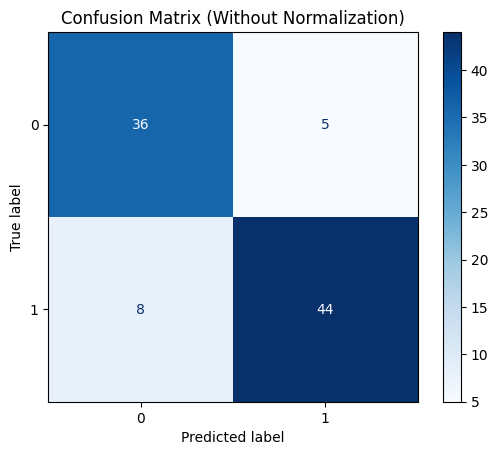

Normalized confusion matrix


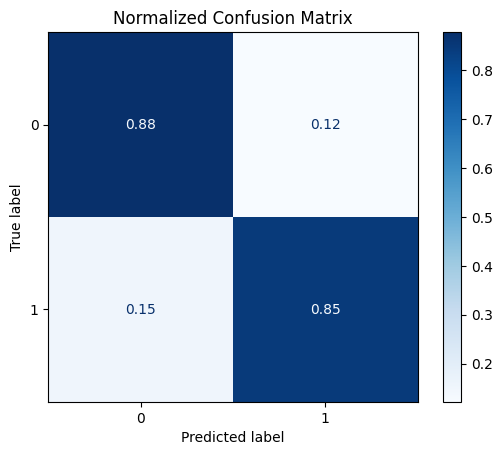

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix without normalization
print('Confusion matrix')
cm = confusion_matrix(y_test, knn.predict(X_test))  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')  
plt.title('Confusion Matrix (Without Normalization)')
plt.show()

# Normalized confusion matrix
print('Normalized confusion matrix')
cm_normalized = confusion_matrix(y_test, knn.predict(X_test), normalize='true')
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=knn.classes_)
disp_normalized.plot(cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.show()

In [33]:
print(classification_report(y_test, pred))
print(classification_report(y_test, pred))

print('Accuracy Score:', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        41
           1       0.90      0.85      0.87        52

    accuracy                           0.86        93
   macro avg       0.86      0.86      0.86        93
weighted avg       0.86      0.86      0.86        93

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        41
           1       0.90      0.85      0.87        52

    accuracy                           0.86        93
   macro avg       0.86      0.86      0.86        93
weighted avg       0.86      0.86      0.86        93

Accuracy Score: 0.8602150537634409


C:\Users\omnia\AppData\Local\Temp\ipykernel_24228\2479066565.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap_points, edgecolor='k', s=50, marker='x', label="Test Data")


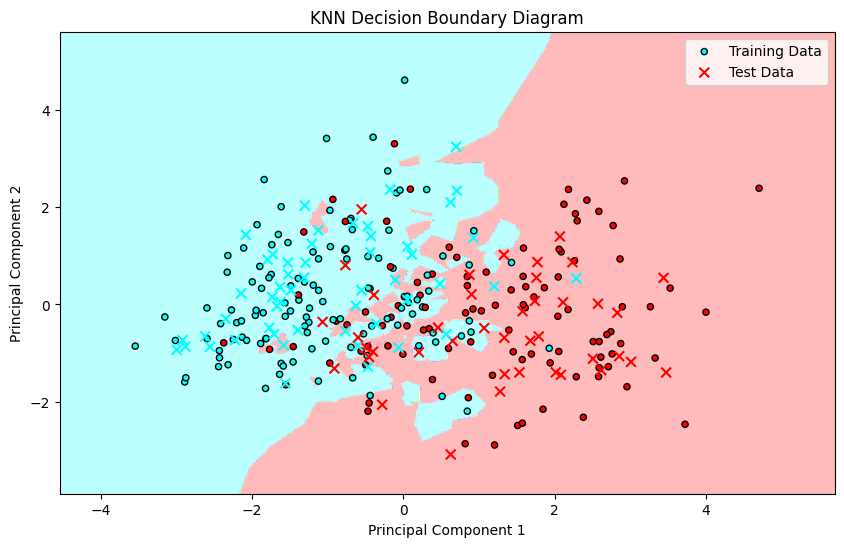

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train, y_train)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


knc.fit(X_train_pca, y_train)


x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


Z = knc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFAAFF', '#AAFFFF'])
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF'])


plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_background)


plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_points, edgecolor='k', s=20, label="Training Data")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap_points, edgecolor='k', s=50, marker='x', label="Test Data")


plt.title('KNN Decision Boundary Diagram')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [36]:
pca = PCA()
pca = PCA(n_components=2)  
x_train = pca.fit_transform(X_train)
x_test = pca.transform(X_test)

In [37]:
pd.DataFrame( data = x_train, columns=["PCA1", "PCA2"])

,PCA1,PCA2
0,0.522169,0.993506
1,2.588763,-1.297464
2,-1.383150,0.089773
3,-1.739921,1.225464
4,2.042626,-0.243072
...,...,...
212,-0.933270,2.155649
213,-2.434220,-0.947438
214,-2.141717,-0.338609
215,4.001199,-0.158558


In [38]:
# Create a DataFrame to display actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual Values': y_test.values,
    'Predicted Values': pred
})

# Display the DataFrame
print(comparison_df)

# Optional: Save it to a CSV file for reference
comparison_df.to_csv("actual_vs_predicted.csv", index=False)


    Actual Values  Predicted Values
0               0                 0
1               0                 0
2               1                 0
3               0                 0
4               0                 0
..            ...               ...
88              0                 1
89              1                 0
90              0                 0
91              1                 0
92              0                 0

[93 rows x 2 columns]


In [39]:
# Define a new sample as an array
new_sample = np.array([[45, 1, 2, 120, 240, 0, 1, 150, 0, 2.5, 1, 0, 3]])  # Example values

# Apply the same scaling transformation used on the training data
new_sample_scaled = s.transform(new_sample)

# Predict the class using the KNN model
new_prediction = knn.predict(new_sample_scaled)

# Display the prediction result
print("\nPrediction for the new sample using KNN:")
if new_prediction[0] == 1:
    print("The model predicts that the person is likely to have heart disease.")
else:
    print("The model predicts that the person is NOT likely to have heart disease.")



Prediction for the new sample using KNN:
The model predicts that the person is NOT likely to have heart disease.


C:\Users\omnia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
